# Lecture 12

In [9]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import os
from PIL import Image
from sklearn.model_selection import train_test_split

## Exercise 12.1
<span style="color:red">Change at will and train your DNN by increasing the number of epochs to an adeuqate value</span>. Try to use at least two other optimizers, different from SGD: <span style="color:red">watch to accuracy and loss for training and validation data and comment on the performances</span>.

### Implementation

In [10]:
# Function to create a Feed Foreward Neural Network
def create_DNN(img_rows, img_cols, num_classes):
    # instantiate model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(tf.keras.layers.Dense(32,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    # soft-max layer
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
    
    return model

In [11]:
seed=0
np.random.seed(seed) 
tf.random.set_seed(seed)

img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes)

optimizer = ['adam', 'sgd', 'rmsprop']
histories = []
results = []

# Execute three differnt 
for opt in optimizer:

    model = create_DNN(28, 28, 10)

    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['acc'])

    history = model.fit(X_train, Y_train,
            batch_size=32,
            epochs=50,
            verbose=1,
            validation_data=(X_test, Y_test),
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8)])
    
    histories.append(history)

    score = model.evaluate(X_test, Y_test, verbose=1)
                           
    results.append({'Optimizer': opt,
                    'Test Loss': score[0],
                    'Test Accuracy': score[1]})

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
Epoch 1/50


2024-07-09 11:18:07.029555: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 2s 1ms/step - loss: 0.4910 - acc: 0.8520 - val_loss: 0.1641 - val_acc: 0.9533
Epoch 2/50
1875/1875 [==============================] - 2s 984us/step - loss: 0.2408 - acc: 0.9320 - val_loss: 0.1225 - val_acc: 0.9627
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1849 - acc: 0.9484 - val_loss: 0.1112 - val_acc: 0.9687
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1564 - acc: 0.9549 - val_loss: 0.1032 - val_acc: 0.9726
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1338 - acc: 0.9609 - val_loss: 0.1103 - val_acc: 0.9705
Epoch 6/50
1875/1875 [==============================] - 2s 976us/step - loss: 0.1231 - acc: 0.9643 - val_loss: 0.1028 - val_acc: 0.9732
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1081 - acc: 0.9677 - val_loss: 0.1095 - val_acc: 0.9757
Epoch 8/50
1875/1875 [==============================] - 2s 995us/step

1875/1875 [==============================] - 2s 929us/step - loss: 0.1018 - acc: 0.9687 - val_loss: 0.0846 - val_acc: 0.9776
Epoch 47/50
313/313 [==============================] - 0s 465us/step - loss: 0.0835 - acc: 0.9788
Epoch 1/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5166 - acc: 0.8439 - val_loss: 0.1748 - val_acc: 0.9510
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2716 - acc: 0.9263 - val_loss: 0.1512 - val_acc: 0.9607
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2334 - acc: 0.9395 - val_loss: 0.1486 - val_acc: 0.9665
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2305 - acc: 0.9428 - val_loss: 0.1511 - val_acc: 0.9661
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2277 - acc: 0.9441 - val_loss: 0.1662 - val_acc: 0.9669
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2350 - acc: 0.9438 - val_loss

In [12]:
df = pd.DataFrame(results)
df

,Optimizer,Test Loss,Test Accuracy
0,adam,0.119195,0.9772
1,sgd,0.083487,0.9788
2,rmsprop,0.229913,0.9655


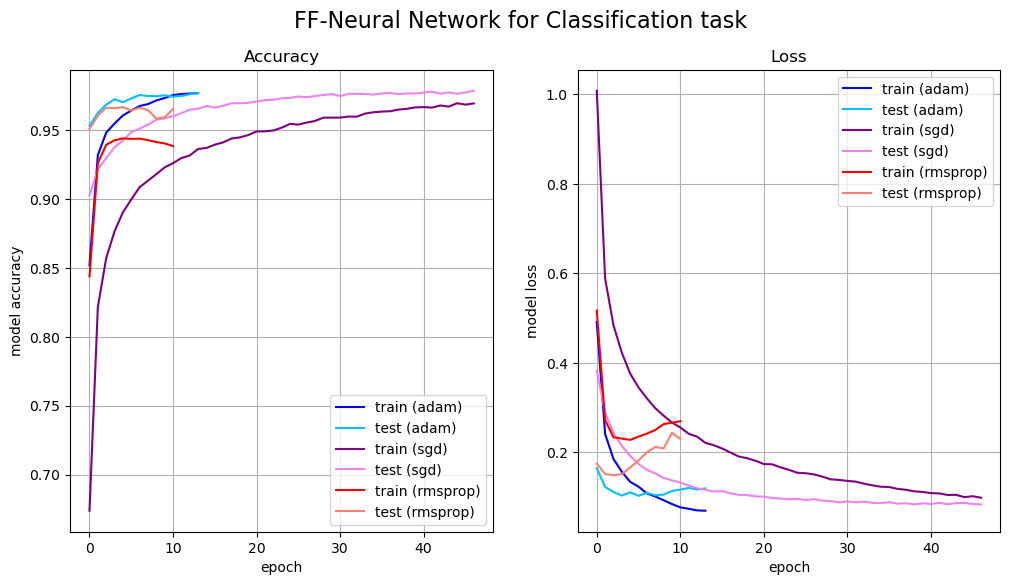

In [13]:
colors = ['blue', 'deepskyblue', 'purple', 'violet', 'red', 'salmon']
color_index = 0
plt.figure(figsize=(12, 6))
for history in histories:

    plt.suptitle("FF-Neural Network for Classification task", fontsize=16)
    plt.subplot(1, 2, 1)
    plt.title("Accuracy")
    plt.plot(history.history['acc'], color=colors[2 * color_index], label=f'train ({optimizer[color_index]})')
    plt.plot(history.history['val_acc'], color=colors[2 * color_index + 1], label=f'test ({optimizer[color_index]})')
    plt.grid()
    plt.ylabel('model accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='best')

    # summarize history for loss
    plt.subplot(1, 2, 2)
    plt.title('Loss')
    plt.plot(history.history['loss'], color=colors[2 * color_index], label=f'train ({optimizer[color_index]})')
    plt.plot(history.history['val_loss'], color=colors[2 * color_index + 1], label=f'test ({optimizer[color_index]})')
    plt.grid()
    plt.ylabel('model loss')
    plt.xlabel('epoch')
    plt.legend(loc='best')
    
    color_index += 1
plt.show()

I implemented early stopping to optimize training efficiency. I chose to employ RMSprop and Adam optimizers: RMSprop adjusts learning rates based on recent gradient magnitudes, while Adam enhances RMSprop with momentum optimization by tracking both gradient moments.

## Exercise 12.2
Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that **<span style="color:red">you should complete</span>**:

### Implementation

In this exercise, I created a new dataset called Digit_Combined_CNN_history by adding noise to some images from the MNIST dataset. This dataset consists of half default MNIST images and half noisy images, aiming to enhance the neural network's generalization power (Noise.py file contains the execution code). I then made predictions on MNIST to evaluate if the combined model would experience any loss in accuracy.

In [14]:
# Function to create a Convolutional Neural Network 
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')])
    return model

In [15]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

combined_history_path = 'Utilities/Digit_Combined_CNN_history.csv'
mnist_history_path = 'Utilities/Digit_MNIST_CNN_history.csv'

if os.path.exists(combined_history_path) and os.path.exists(mnist_history_path):
    history_combined = pd.read_csv(combined_history_path)
    history_mnist = pd.read_csv(mnist_history_path)
    
else:
    
    # ========================================
    # TRAIN NEURAL NETWORK ON COMBINED DATASET
    # ========================================
    dataset = np.load('Utilities/combined_mnist_noisy_dataset.npz')
    x_data = dataset['x_train']
    y_data = dataset['y_train']
    x_data = x_data.reshape(-1, 28, 28, 1).astype('float32')

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=seed)

    model = create_model()
    model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, 
                        batch_size=32, 
                        epochs=50, 
                        verbose=True, 
                        validation_data=(x_test, y_test),
                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8)])

    history_combined = history.history
    pd.DataFrame(history_combined).to_csv(combined_history_path, index=False)

    model.save('Utilities/Digits_Combined_CNN.h5')

    # =====================================
    # TRAIN NEURAL NETWORK ON MNIST DATASET
    # =====================================
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_data = np.concatenate((x_train, x_test), axis=0)
    y_data = np.concatenate((y_train, y_test), axis=0)

    idx_original = np.random.choice(len(x_data), 60000, replace=False)
    x_data = x_data[idx_original]
    y_data = y_data[idx_original]

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=seed)

    x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

    model = create_model()
    model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, 
                        batch_size=32, 
                        epochs=50, 
                        verbose=True, 
                        validation_data=(x_test, y_test),
                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8)])

    history_mnist = history.history
    pd.DataFrame(history_mnist).to_csv(mnist_history_path, index=False)

    model.save('Utilities/Digits_MNIST_CNN.h5')

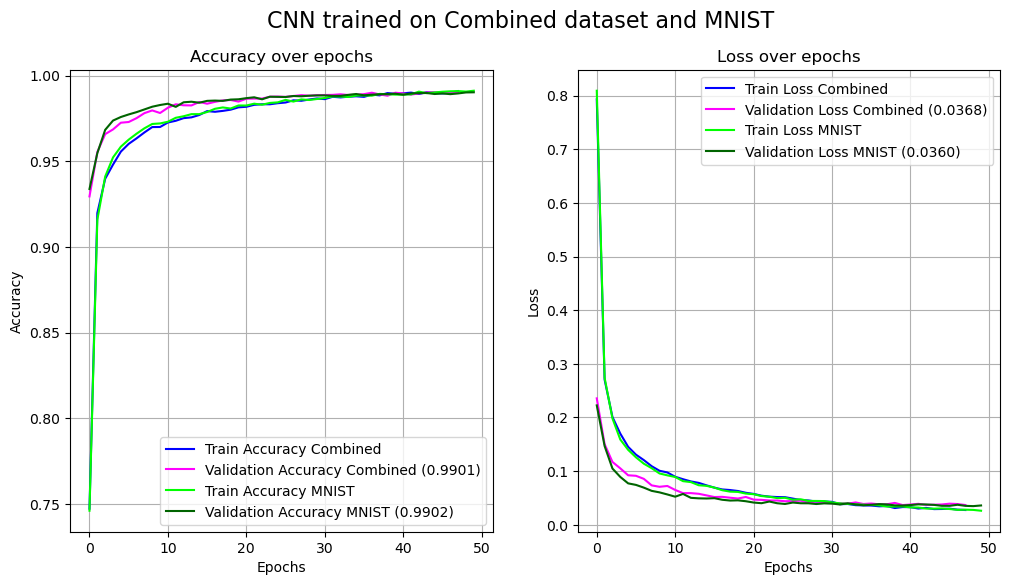

In [16]:
# Plotting the metrics

last_val_loss_combined = history_combined['val_loss'][len(history_combined['val_loss']) - 1]
last_val_loss_mnist = history_mnist['val_loss'][len(history_mnist['val_loss']) - 1]
last_val_accuracy_combined = history_combined['val_accuracy'][len(history_combined['val_accuracy']) - 1]
last_val_accuracy_mnist = history_mnist['val_accuracy'][len(history_mnist['val_accuracy']) - 1]

plt.figure(figsize=(12, 6))
plt.suptitle("CNN trained on Combined dataset and MNIST", fontsize=16)

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_combined['accuracy'], label='Train Accuracy Combined', color='blue')
plt.plot(history_combined['val_accuracy'], label=f'Validation Accuracy Combined ({last_val_accuracy_combined:.4f})', color='fuchsia')
plt.plot(history_mnist['accuracy'], label='Train Accuracy MNIST', color='lime')
plt.plot(history_mnist['val_accuracy'], label=f'Validation Accuracy MNIST ({last_val_accuracy_mnist:.4f})', color='darkgreen')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy over epochs')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_combined['loss'], label='Train Loss Combined', color='blue')
plt.plot(history_combined['val_loss'], label=f'Validation Loss Combined ({last_val_loss_combined:.4f})', color='fuchsia')
plt.plot(history_mnist['loss'], label='Train Loss MNIST', color='lime')
plt.plot(history_mnist['val_loss'], label=f'Validation Loss MNIST ({last_val_loss_mnist:.4f})', color='darkgreen')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.title('Loss over epochs')

plt.show()

## Exercise 12.3
Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

### Implementation

In [17]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


x_train = x_train[:10]
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32')
print("Shape of x_train:", x_train.shape)

# Load images from the directory
samples = []
for i in range(10):
    path = f'Images/Image_{i}.png'
    image = Image.open(path).convert('L')
    image = image.resize((28, 28))
    data = np.array(image) / 255.0
    samples.append(data)

samples = np.array(samples)
samples = samples.reshape(-1, 28, 28, 1).astype('float32')
print("Shape of samples:", samples.shape)

# Load the convolutional neural network
model_1 = tf.keras.models.load_model('Utilities/Digits_MNIST_CNN.h5')
#print('Convolutional Neural Network summary:\n', modeL_1.summary())
model_2 = tf.keras.models.load_model('Utilities/Digits_Combined_CNN.h5')


# Predictions on training set
predictions_1 = model_1.predict(x_train)
predictions_2 = model_2.predict(x_train)

Shape of x_train: (10, 28, 28, 1)
Shape of samples: (10, 28, 28, 1)
1/1 [==============================] - 0s 31ms/step


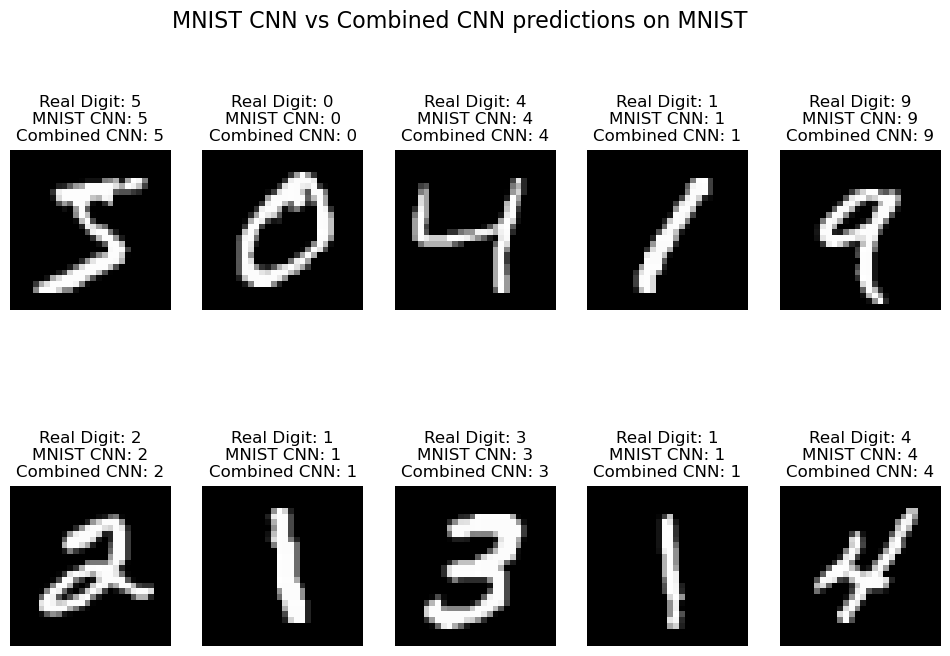

In [18]:
plt.figure(figsize=(12, 8))
plt.suptitle("MNIST CNN vs Combined CNN predictions on MNIST", fontsize=16)
for i in range(10):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i, :, :, 0], cmap='gray')
    plt.title(f"Real Digit: {y_train[i]}\nMNIST CNN: {np.argmax(predictions_1[i])}\nCombined CNN: {np.argmax(predictions_2[i])}")
    plt.axis('off')
plt.show()

1/1 [==============================] - 0s 11ms/step


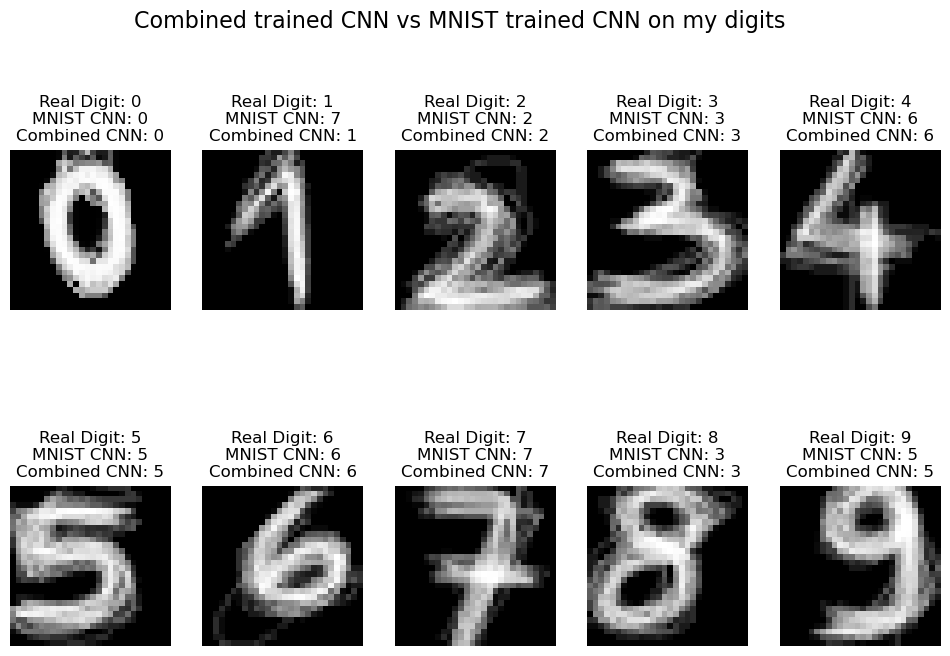

In [19]:
## Predict on the uploaded images
predictions_1 = model_1.predict(samples)
predictions_2 = model_2.predict(samples)

plt.figure(figsize=(12, 8))
plt.suptitle('Combined trained CNN vs MNIST trained CNN on my digits', fontsize=16)

for i in range(10):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(samples[i, :, :, 0], cmap='gray')
    plt.title(f"Real Digit: {i}\nMNIST CNN: {np.argmax(predictions_1[i])}\nCombined CNN: {np.argmax(predictions_2[i])}")
    plt.axis('off')

plt.show()

The results did not clearly demonstrate an improvement in the neural network trained on the combined dataset. This is likely because convolutional neural networks excel at identifying relevant information among multiple pixels. Therefore, the type of noise I added to the images (more pronounced markings) does not pose a significant challenge to the convolutional neural network's ability to make accurate predictions.